In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
sns.set(style="whitegrid")

In [2]:
# load the data
df = pd.read_csv("C:/Users/mintesinot/10_acadamey/solar-challenge-week1/data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
#Summary Statistics & Missing Value Report

# Summary statistics
df.describe()

# Missing value count
missing = df.isna().sum()
missing[missing > 0]  # Columns with missing values

# Percentage of nulls
percent_null = (df.isna().sum() / len(df)) * 100
percent_null[percent_null > 5]

Comments    100.0
dtype: float64

In [4]:
#Outlier Detection

# Z-score calculation
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = np.abs(stats.zscore(df[cols_to_check].dropna()))
outliers = (z_scores > 3).sum(axis=0)
print("Outlier count per column:\n", dict(zip(cols_to_check, outliers)))

Outlier count per column:
 {'GHI': np.int64(2477), 'DNI': np.int64(7586), 'DHI': np.int64(2986), 'ModA': np.int64(1604), 'ModB': np.int64(2041), 'WS': np.int64(3967), 'WSgust': np.int64(3665)}


In [5]:
#Cleaning

# Fill missing values with median
df_cleaned = df.copy()
for col in cols_to_check:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Save cleaned CSV
df_cleaned.to_csv("C:/Users/mintesinot/10_acadamey/solar-challenge-week1/data/sierraleone-bumbuna_clean.csv", index=False)

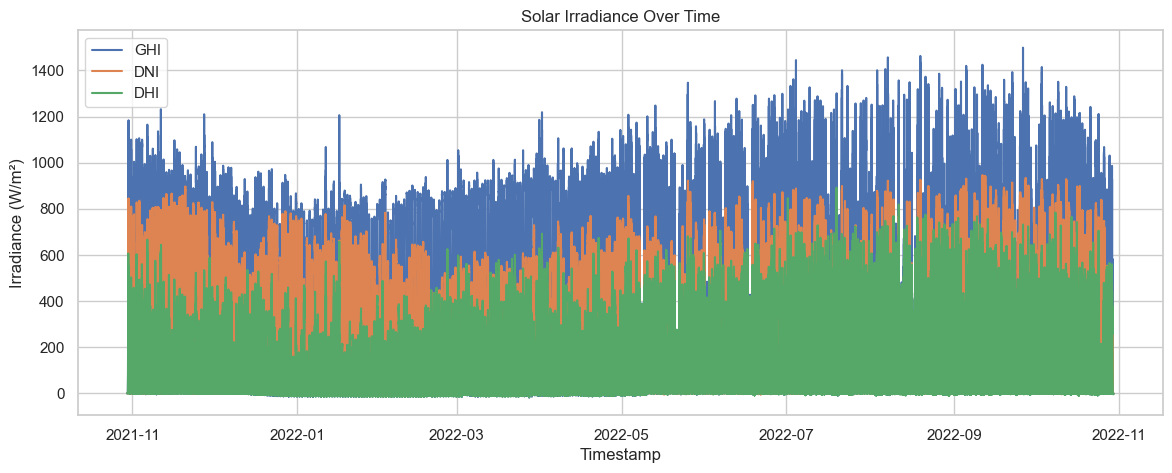

In [6]:
#Time Series Visuals
plt.figure(figsize=(14, 5))
plt.plot(df_cleaned["Timestamp"], df_cleaned["GHI"], label="GHI")
plt.plot(df_cleaned["Timestamp"], df_cleaned["DNI"], label="DNI")
plt.plot(df_cleaned["Timestamp"], df_cleaned["DHI"], label="DHI")
plt.legend()
plt.title("Solar Irradiance Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.show()


<Axes: title={'center': 'Average ModA & ModB by Cleaning'}, xlabel='Cleaning'>

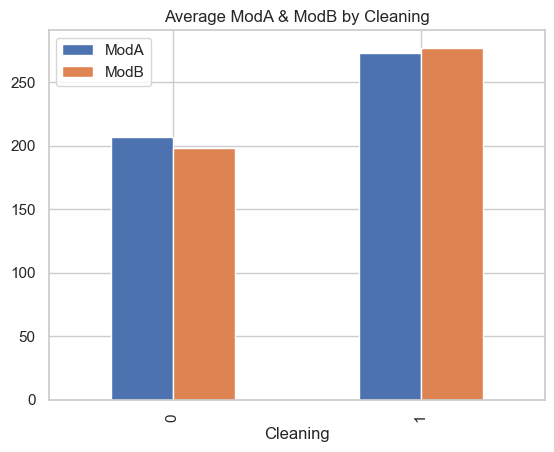

In [7]:
# Cleaning Impact Analysis
mod_avg = df_cleaned.groupby("Cleaning")[["ModA", "ModB"]].mean()
mod_avg.plot(kind="bar", title="Average ModA & ModB by Cleaning")

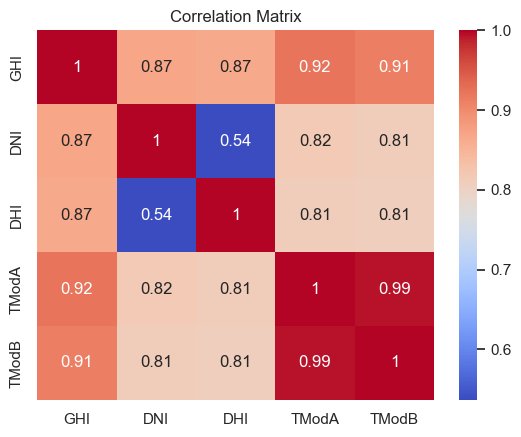

In [8]:
 # Correlation Heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df_cleaned[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


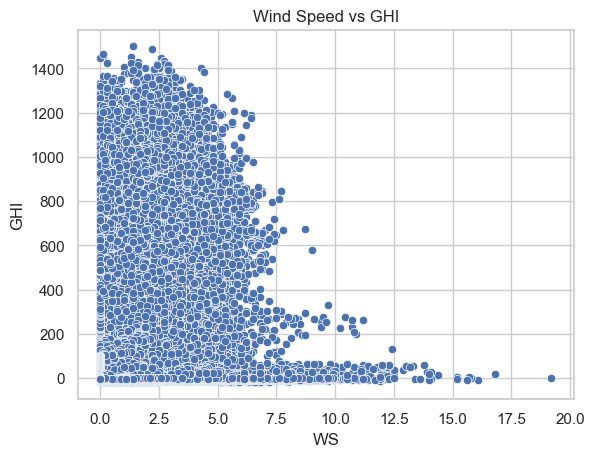

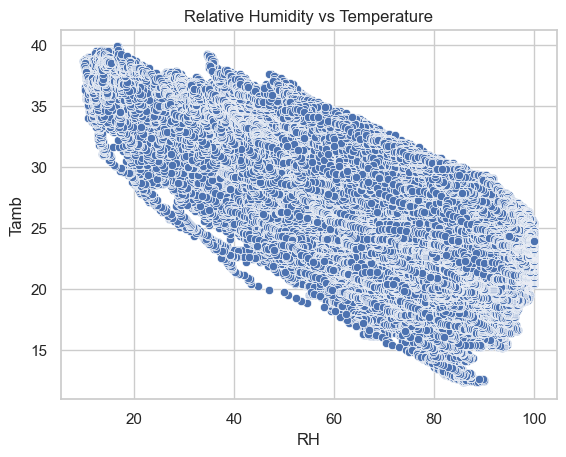

In [9]:
# scater plot
sns.scatterplot(x="WS", y="GHI", data=df_cleaned)
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(x="RH", y="Tamb", data=df_cleaned)
plt.title("Relative Humidity vs Temperature")
plt.show()

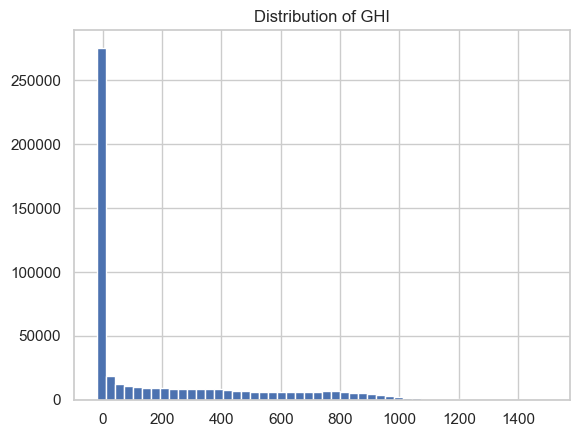

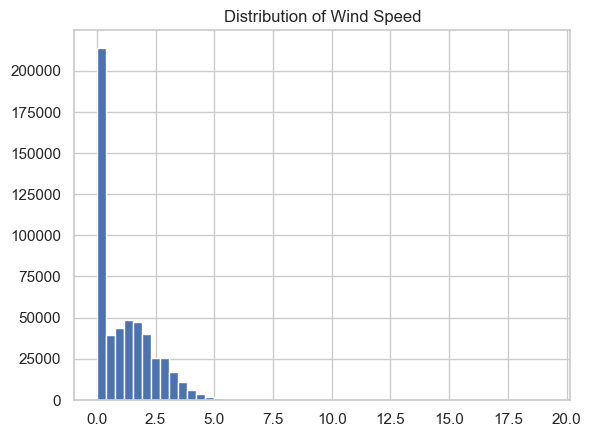

In [10]:
#Histogram
df_cleaned["GHI"].hist(bins=50)
plt.title("Distribution of GHI")
plt.show()

df_cleaned["WS"].hist(bins=50)
plt.title("Distribution of Wind Speed")
plt.show()

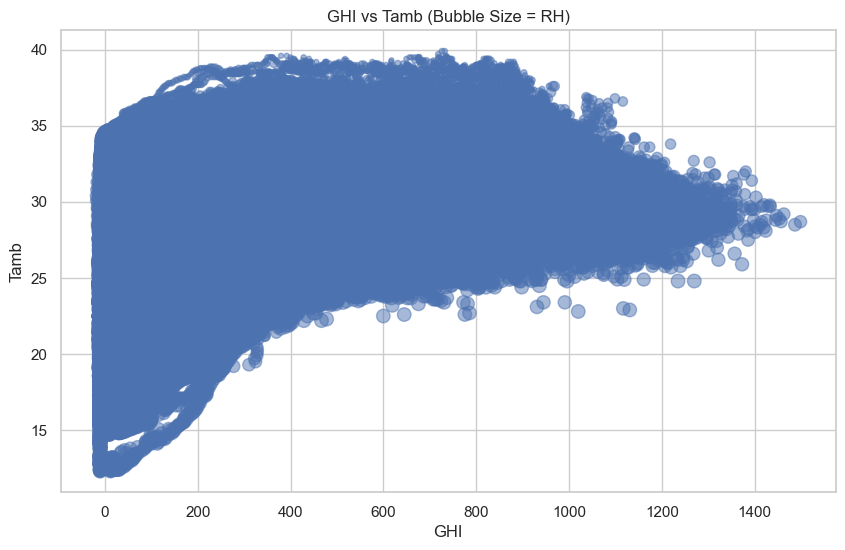

In [11]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["GHI"], df_cleaned["Tamb"], s=df_cleaned["RH"], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.show()